In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-insurance-cross-sell-prediction/sample_submission.csv
/kaggle/input/health-insurance-cross-sell-prediction/train.csv
/kaggle/input/health-insurance-cross-sell-prediction/test.csv


In [25]:
# Building a model to predict whether a customer would be interested in Health Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

In [3]:
train_data= pd.read_csv('../input/health-insurance-cross-sell-prediction/train.csv')
test_data = pd.read_csv('../input/health-insurance-cross-sell-prediction/test.csv')

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


1. 12 Columns and 381109 Row.
2. Out of which one is dependent variable and rest 11 are independent variables.
3. Columns of Type and count: Object - 3, Float-3 , int - 6 
4. No variable column has null/missing values.

In [28]:
train_data.describe().T

count           mean            std     min      25%  \
id                    381109.0  190555.000000  110016.836208     1.0  95278.0   
Age                   381109.0      38.822584      15.511611    20.0     25.0   
Driving_License       381109.0       0.997869       0.046110     0.0      1.0   
Region_Code           381109.0      26.388807      13.229888     0.0     15.0   
Previously_Insured    381109.0       0.458210       0.498251     0.0      0.0   
Annual_Premium        381109.0   30564.389581   17213.155057  2630.0  24405.0   
Policy_Sales_Channel  381109.0     112.034295      54.203995     1.0     29.0   
Vintage               381109.0     154.347397      83.671304    10.0     82.0   
Response              381109.0       0.122563       0.327936     0.0      0.0   

                           50%       75%       max  
id                    190555.0  285832.0  381109.0  
Age                       36.0      49.0      85.0  
Driving_License            1.0       1.0       1.0  
Region_Code               28.0      35.0      52.0  
Previously_Insured         0.0       1.0       1.0  
Annual_Premium         31669.0   39400.0  540165.0  
Policy_Sales_Channel     133.0     152.0     163.0  
Vintage                  154.0     227.0     299.0  
Response                   0.0       0.0       1.0

1. Mean value is less than median value of column which is represented by 50%(50th percentile) in index column- Driving_License,Region_Code, Annual_Premium, Policy_Sales_Channel
2. Mean value is more than median value of column: Age, Vintage, Previously_Insured
3. There is notably a large difference between 75th %tile and max values of predictors: Annual_Premium, Vintage

4. Observation from above, Outliers present.

In [4]:
train_data.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

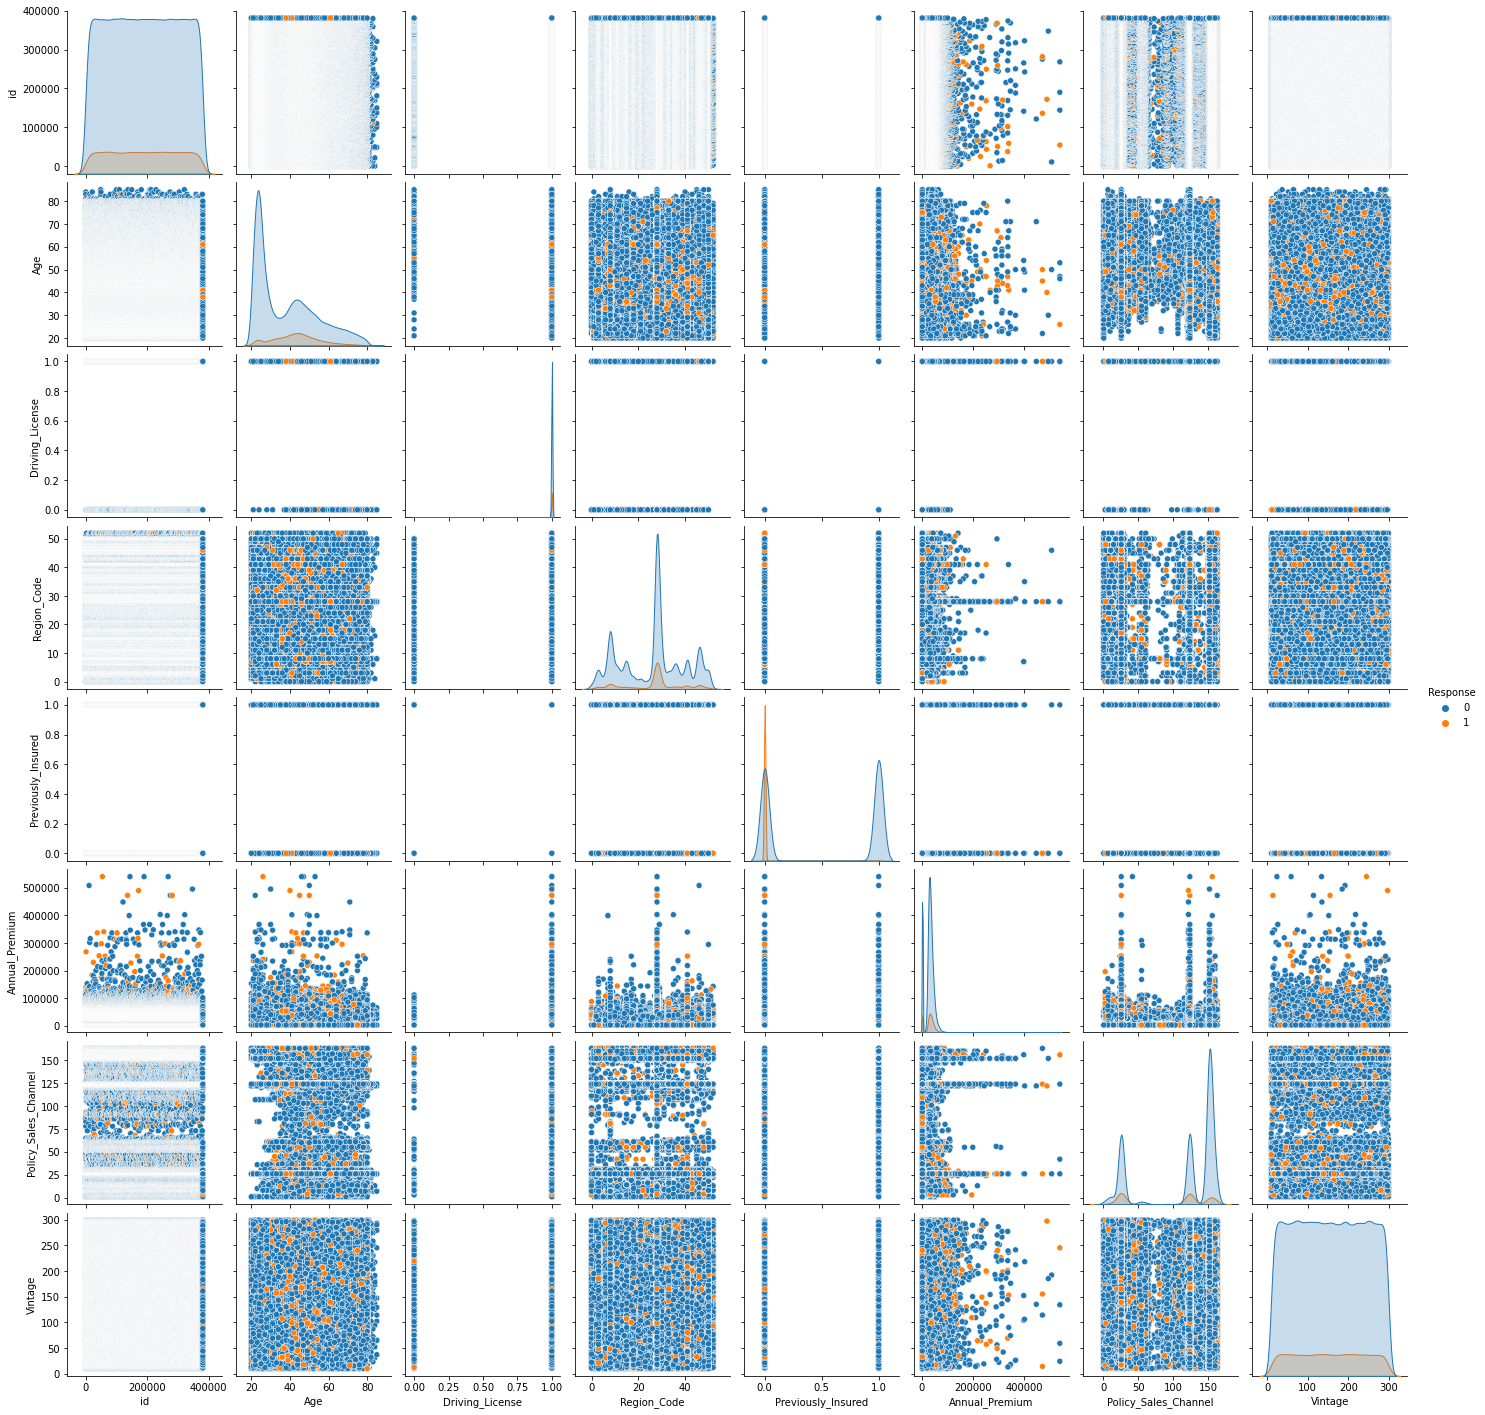

In [5]:
sns.pairplot(train_data, hue ='Response')

This tells us vote count of each Response in descending order.
“Response” has values concentrated in the categories 0 and 1.

In [30]:
train_data.corr()

id       Age  Driving_License  Region_Code  \
id                    1.000000  0.001561        -0.000564    -0.000572   
Age                   0.001561  1.000000        -0.079782     0.042574   
Driving_License      -0.000564 -0.079782         1.000000    -0.001081   
Region_Code          -0.000572  0.042574        -0.001081     1.000000   
Previously_Insured    0.002457 -0.254682         0.014969    -0.024659   
Annual_Premium        0.003027  0.067507        -0.011906    -0.010588   
Policy_Sales_Channel -0.002837 -0.577826         0.043731    -0.042420   
Vintage              -0.000630 -0.001264        -0.000848    -0.002750   
Response             -0.001368  0.111147         0.010155     0.010570   

                      Previously_Insured  Annual_Premium  \
id                              0.002457        0.003027   
Age                            -0.254682        0.067507   
Driving_License                 0.014969       -0.011906   
Region_Code                    -0.024659       -0.010588   
Previously_Insured              1.000000        0.004269   
Annual_Premium                  0.004269        1.000000   
Policy_Sales_Channel            0.219381       -0.113247   
Vintage                         0.002537       -0.000608   
Response                       -0.341170        0.022575   

                      Policy_Sales_Channel   Vintage  Response  
id                               -0.002837 -0.000630 -0.001368  
Age                              -0.577826 -0.001264  0.111147  
Driving_License                   0.043731 -0.000848  0.010155  
Region_Code                      -0.042420 -0.002750  0.010570  
Previously_Insured                0.219381  0.002537 -0.341170  
Annual_Premium                   -0.113247 -0.000608  0.022575  
Policy_Sales_Channel              1.000000  0.000002 -0.139042  
Vintage                           0.000002  1.000000 -0.001050  
Response                         -0.139042 -0.001050  1.000000

<AxesSubplot:>

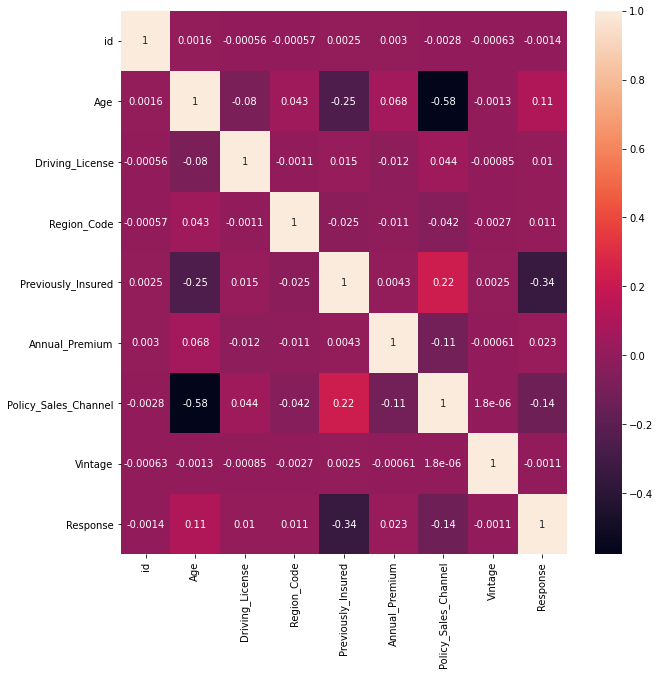

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(train_data.corr(), annot=True)

1. Very Low Positive Correlation and Negative Correlation are observed in range -0.58 to 0.22
2. Since correlation is approximately to zero we can infer there is no linear relationship between these two predictors.However it is safe to drop these features in case you’re applying Linear Regression model to the dataset.

Gender
Vehicle_Age
Vehicle_Damage


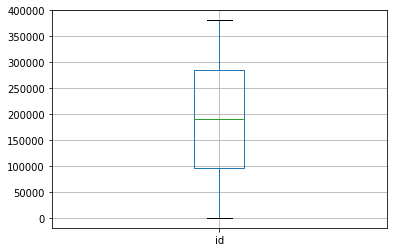

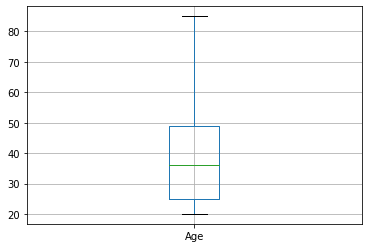

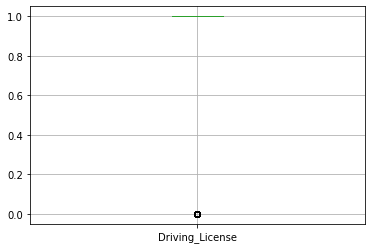

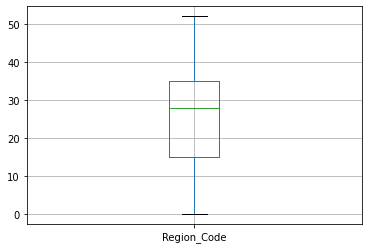

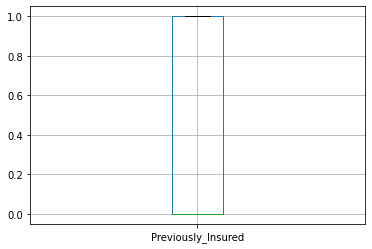

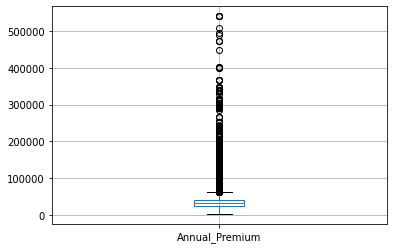

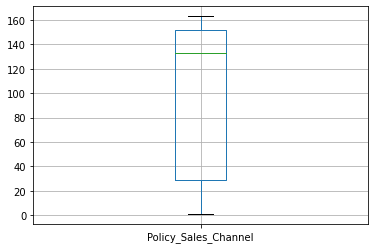

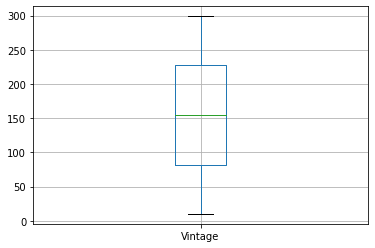

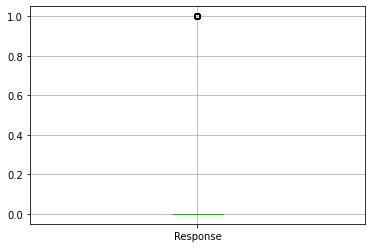

In [32]:
# Box Plot for Outliers
for columns in train_data:
    if train_data[columns].dtypes == object:
        print(columns)
        
    else:    
        plt.figure()
        train_data.boxplot([columns])

In our data set only “Annual_Premium” feature column shows outliers.

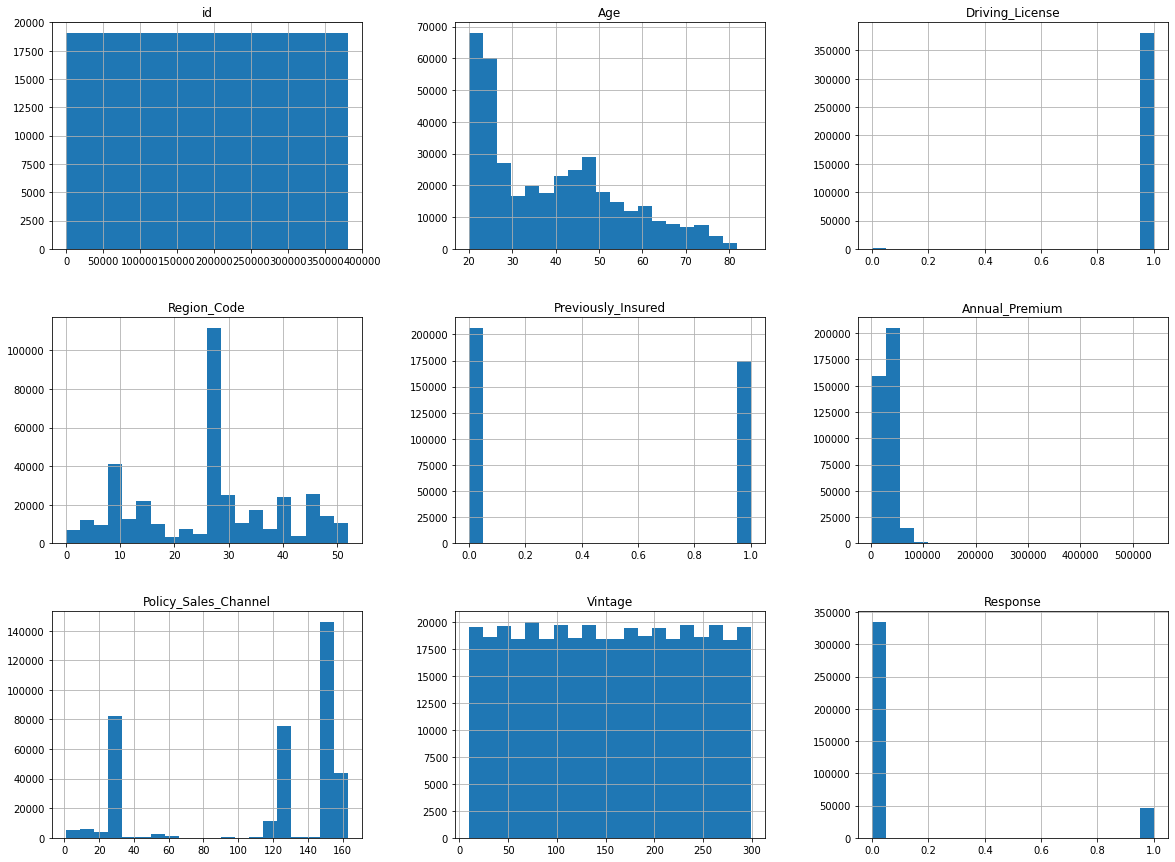

In [33]:
# check the linearity of the variables - distribution graphs and look for skewness of features
# - UNIVARIANT ANALYSIS
train_data.hist(bins= 20, figsize=(20,15))
plt.show()

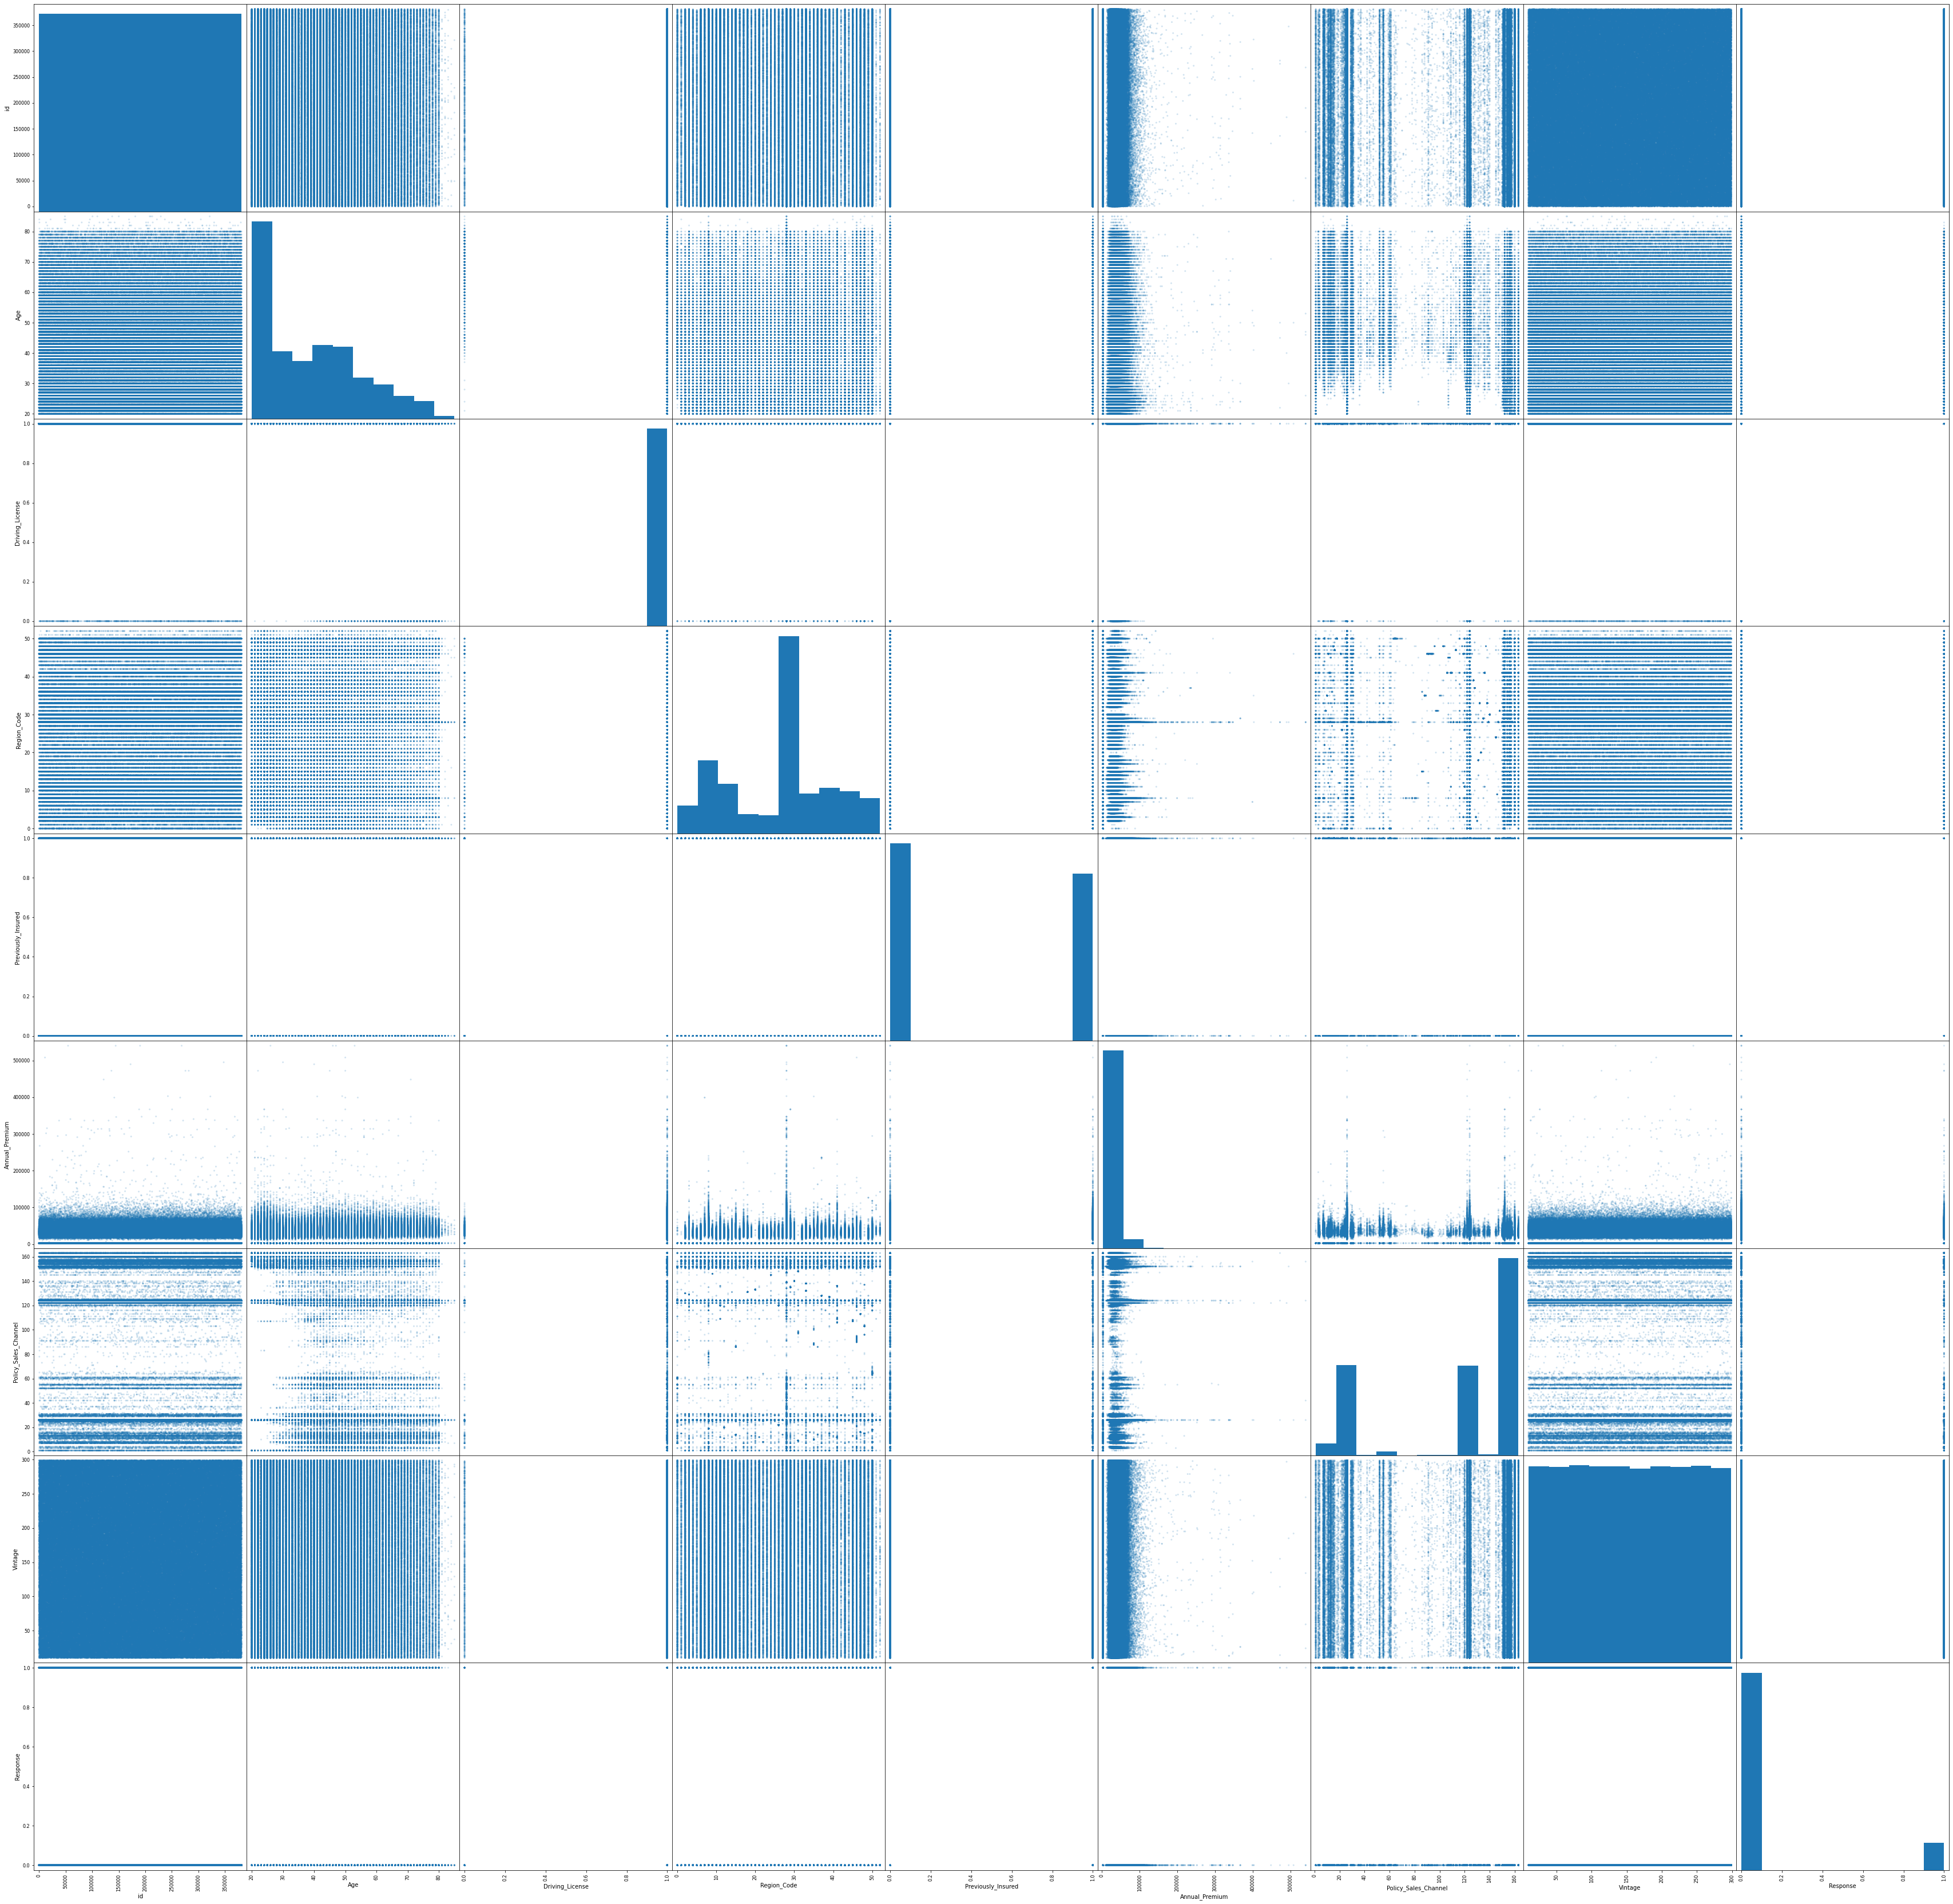

In [34]:
# BIVARIANT ANALYSIS
from pandas.plotting import scatter_matrix
# pair analysis
scatter_matrix(train_data, alpha=0.2, figsize=(60, 60))
plt.show()

In [35]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3 #optimal
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(train_data.Annual_Premium)

print(len(sample_outliers))

2083


In [36]:
# Handling Outliers - As the mean value is highly influenced by the outliers, it is advised to replace the outliers with the median value.
median = np.median(train_data.Annual_Premium)# Replace with median
for i in sample_outliers:
    c = np.where(train_data.Annual_Premium==i, 14, train_data.Annual_Premium)
print("Sample: ", train_data.Annual_Premium)
print("New array: ",c)
# print(x.dtype)

Sample:  0         40454.0
1         33536.0
2         38294.0
3         28619.0
4         27496.0
           ...   
381104    30170.0
381105    40016.0
381106    35118.0
381107    44617.0
381108    41777.0
Name: Annual_Premium, Length: 381109, dtype: float64
New array:  [40454. 33536. 38294. ... 35118. 44617. 41777.]


In [37]:
# Split the Data
from sklearn.model_selection import train_test_split

X=train_data.drop(['id','Response'],axis=1)
y=train_data.Response

In [38]:
# Categorical column - Label Encoding
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
le= LabelEncoder()
for feature in X.columns: # Loop through all columns in the dataframe
    if X[feature].dtype == 'object': # Only apply for columns with categorical strings
        X[feature]= le.fit_transform(X[feature])      

X.head()

Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       1   44                1         28.0                   0            2   
1       1   76                1          3.0                   0            0   
2       1   47                1         28.0                   0            2   
3       1   21                1         11.0                   1            1   
4       0   29                1         41.0                   1            1   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0               1         40454.0                  26.0      217  
1               0         33536.0                  26.0      183  
2               1         38294.0                  26.0       27  
3               0         28619.0                 152.0      203  
4               0         27496.0                 152.0       39

In [39]:
# Labelling Test Data
for feature in test_data.columns: # Loop through all columns in the dataframe
    if test_data[feature].dtype == 'object': # Only apply for columns with categorical strings
        test_data[feature]= le.fit_transform(test_data[feature])

In [40]:
# Standard scaler helps us to make all variable in same unit.
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()

std_x = standard.fit_transform(X)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 7)# Stratify y to keep the class proportions consistent
# Print the number of train and test records.
print("Train Data:",X_train.shape)
print("Test Data:",X_test.shape)

Train Data: (285831, 10)
Test Data: (95278, 10)


In [42]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_nb = gnb.fit(X_train, y_train).predict(X_test)
y_pred_nb

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_nb)

array([[76426,  7216],
       [ 8444,  3192]])

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91     83642
           1       0.31      0.27      0.29     11636

    accuracy                           0.84     95278
   macro avg       0.60      0.59      0.60     95278
weighted avg       0.83      0.84      0.83     95278



In [45]:

pred_test = gnb.predict(test_data.drop('id',axis=1))
submission = pd.DataFrame({'id':np.arange(381110, 381110+len(pred_test)),'Response':pred_test})

submission.to_csv('.//sample_submission.csv',index=False)

In [46]:
submission.head(10)

id  Response
0  381110         0
1  381111         1
2  381112         0
3  381113         0
4  381114         0
5  381115         0
6  381116         0
7  381117         0
8  381118         1
9  381119         0